In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import pandas as pd
from scipy.optimize import curve_fit

In [2]:
df_0405 = pd.read_pickle('data/data_0405.pkl')
df_0607 = pd.read_pickle('data/data_0607.pkl')
df_0809 = pd.read_pickle('data/data_0809.pkl')
df_1011 = pd.read_pickle('data/data_1011.pkl')
df_1213 = pd.read_pickle('data/data_1213.pkl')
df_1415 = pd.read_pickle('data/data_1415.pkl')
df_1617 = pd.read_pickle('data/data_1617.pkl')

vims_wave = np.loadtxt('vims_wave.txt')

In [3]:
def powerlaw(x,a,b):
    return a*np.power(x,b)

def gaussian(x,a,mu,sigma):
    return a*np.exp(-(x-mu)**2/(2*sigma**2))

band_channels = [29,30,31,32,33,34,46,47,48,49,50,51,52,53,54,55,56,57,58,59,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,102,103,104,105]

def fit_line(dataframe):
    spectra = np.average(dataframe)
    my_fit,_ = curve_fit(powerlaw,vims_wave[band_channels],spectra[band_channels],p0=[.15,-12])
    final_fit = powerlaw(vims_wave,*my_fit)
    return final_fit

def custom_fit(dataframe):
    spectra = np.average(dataframe)
    my_fit,_ = curve_fit(powerlaw,vims_wave[band_channels],spectra[band_channels],p0=[.15,-12])
    final_spectra = spectra-powerlaw(vims_wave,*my_fit)
    return final_spectra

In [4]:
spectra_0405 = custom_fit(df_0405)
spectra_0607 = custom_fit(df_0607)
spectra_0809 = custom_fit(df_0809)
spectra_1011 = custom_fit(df_1011)
spectra_1213 = custom_fit(df_1213)
spectra_1415 = custom_fit(df_1415)
spectra_1617 = custom_fit(df_1617)

spectra_list = [spectra_0405,spectra_0607,spectra_0809,spectra_1011,spectra_1213,spectra_1415,spectra_1617]

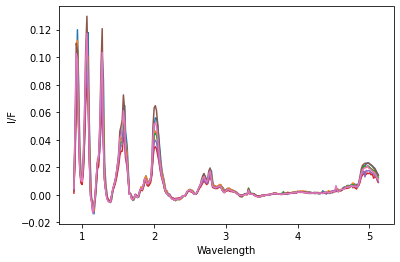

In [5]:
%matplotlib inline
x = vims_wave
for spectra in spectra_list:
    plt.plot(x,spectra)
plt.xlabel('Wavelength')
plt.ylabel('I/F')
plt.show()

In [27]:
micron_window = list(range(56,81))

/usr/local/anaconda3/lib/python3.9/site-packages/scipy/optimize/_minpack_py.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


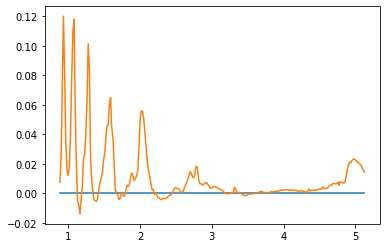

In [29]:
%matplotlib inline
x = vims_wave
y = spectra_0405

mean = np.average(spectra_0405[56:81])
std_0405 = np.std(spectra_0405[56:81])

my_fit,_ = curve_fit(gaussian,x[micron_window],y[micron_window],p0=[1,mean,std_0405])

plt.plot(x,gaussian(x,*my_fit))
plt.plot(x,y)
plt.show()
